In [139]:
import cv2
import os as os
from os import listdir
from os.path import isfile, join
import json
import pickle
import torch
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np
import torch.nn as nn
import random
import time

In [140]:
from dataset import *
DATASET_PATH = "data/"
SIZE = 32

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


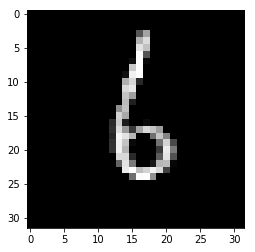

In [133]:
dataset = EmojiDataset()
files = [f for f in listdir(DATASET_PATH)]
i = 0
for name in files:
    if name !=  '.DS_Store':
        i+=1
        openName = DATASET_PATH + name
        img = cv2.imread(openName)
        height, width = img.shape[:2]
        scalingFactor = SIZE / float(height)
        img = cv2.resize(img, None, fx=scalingFactor, fy=scalingFactor, interpolation=cv2.INTER_AREA)
        img = (img / 255 - 0.5) * 2
        sample = torch.from_numpy(img).type(torch.float)
        dataset.add(sample)
        
saveToFile(dataset, "dataset.pkl")
plt.imshow(img)

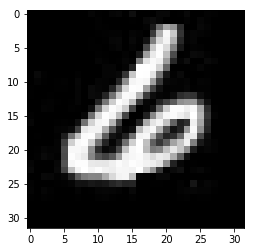

In [138]:
dataLoader = MyLoader(dataset, 0, len(dataset) - 1)
a = dataLoader.getBatch()
a.size()
b = a[13].view((3,32,32))
b = (b / 2 + 0.5) * 255
c = b.view(32,32,3).detach().numpy().astype(np.int)
cv2.imwrite("test.jpg",c)
plt.imshow(c)

In [137]:
saveToFile(dataLoader, "dataLoader.pkl")

In [81]:
def noisyRealLabel():
    return np.random.uniform(0.7, 1.2)
a = torch.tensor([noisyRealLabel() for i in range(10)])
a.fill_(noisyRealLabel())

tensor([1.0140, 1.0140, 1.0140, 1.0140, 1.0140, 1.0140, 1.0140, 1.0140, 1.0140,
        1.0140])

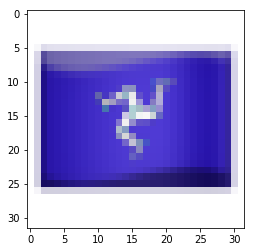

In [141]:
dataLoader = loadFromFile("dataLoader.pkl")
a = dataLoader.getBatch()
b = a[13].view((3,32,32))
b = (b / 2 + 0.5) * 255
c = b.view(32,32,3).detach().numpy().astype(np.int)
cv2.imwrite("test.jpg",c)
plt.imshow(c)